In [4]:
import numpy as np
import pandas
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.impute import KNNImputer
from sklearn.metrics import matthews_corrcoef, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [5]:
from mlxtend.plotting import plot_decision_regions

In [6]:
os.chdir(r'E:\NNSience\Dwarfs\Brown-Dwarfs-NN\data')

In [7]:
df = pandas.read_csv('data1.csv')
df.head()

,SpT,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,...,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag,label
0,T4.5,NaN,NaN,NaN,NaN,NaN,19.17,0.01,17.42,0.01,...,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,NaN,20.37,0.01,18.85,0.02,17.81,0.01,...,0.04,12.97,0.02,12.54,0.02,11.67,0.24,8.93,NaN,True
2,L1pec(blue),NaN,NaN,NaN,20.21,0.03,18.57,0.01,17.57,0.01,...,0.09,14.34,0.03,13.99,0.05,12.36,NaN,8.45,NaN,True
3,L5.5,NaN,NaN,NaN,22.30,0.08,20.30,0.04,19.31,0.03,...,0.22,14.82,0.03,14.57,0.06,11.73,NaN,8.10,NaN,True
4,L9,NaN,NaN,NaN,NaN,NaN,21.05,0.08,19.87,0.06,...,NaN,15.34,0.04,14.70,0.07,12.03,NaN,8.41,NaN,True


In [8]:
X = df.loc[:, 'PS1gmag':'e_W4mag']
y = df.loc[:, 'label']

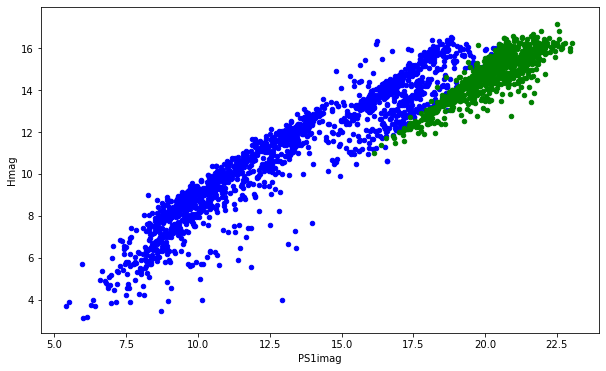

In [9]:
mag1='PS1imag'
mag2='Hmag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

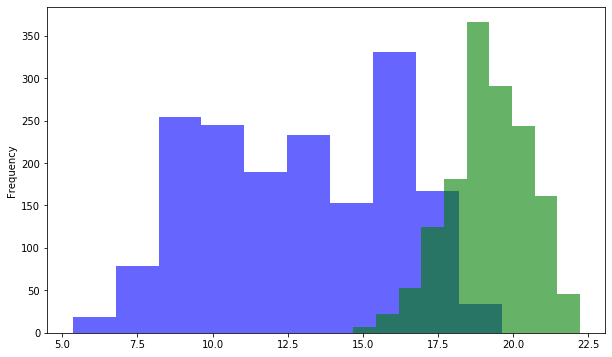

In [10]:
df1 = df[df['label'] == False].PS1zmag
fp=df1.plot.hist(alpha=0.6, color='b', figsize=(10, 6))
df2 = df[df['label'] == True].PS1zmag
df2.plot.hist(alpha=0.6, color='g')
plt.show()

In [11]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X = imputer.fit_transform(X)
cols = df.loc[:, 'PS1gmag':'e_W4mag']
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx.head()

,PS1gmag,e_PS1gmag,PS1rmag,PS1imag,e_PS1imag,PS1zmag,e_PS1zmag,PS1ymag,e_PS1ymag,Jmag,...,Ksmag,e_Ksmag,W1mag,e_W1mag,W2mag,e_W2mag,W3mag,e_W3mag,W4mag,e_W4mag
0,20.973000,0.136733,22.253333,20.846667,0.063333,19.17,0.01,17.42,0.01,15.06,...,14.840000,0.120000,14.39,0.036667,12.956667,0.03,11.94,0.300000,8.623333,0.520000
1,22.443333,0.160000,22.450000,20.370000,0.010000,18.85,0.02,17.81,0.01,15.52,...,13.710000,0.040000,12.97,0.020000,12.540000,0.02,11.67,0.240000,8.930000,0.433333
2,22.067333,0.152100,22.260000,20.210000,0.030000,18.57,0.01,17.57,0.01,15.71,...,14.700000,0.090000,14.34,0.030000,13.990000,0.05,12.36,0.456667,8.450000,0.476667
3,22.661333,0.121433,22.940000,22.300000,0.080000,20.30,0.04,19.31,0.03,17.17,...,15.660000,0.220000,14.82,0.030000,14.570000,0.06,11.73,0.320000,8.100000,0.433333
4,22.661333,0.084433,22.580000,22.623333,0.140000,21.05,0.08,19.87,0.06,17.36,...,15.593333,0.113333,15.34,0.040000,14.700000,0.07,12.03,0.370000,8.410000,0.420000


In [12]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123)

Test of learning rules on L&T data sample with Carnero Rosell et al.(2019) and Burningham et al.(2013)
Lots of objects were initially misclassified due to the lack of the data needed. The results after imputing with KNN:

In [13]:
cols = df.loc[:, 'PS1gmag':'e_W4mag']
pos = pandas.DataFrame(data=x_val, columns=cols.columns)
mask =  (pos['PS1zmag']-pos['PS1ymag']>0.15) & (pos['PS1imag']-pos['PS1zmag']>1.27) & (pos['PS1ymag']-pos['Jmag']>1.6)
#mask =  (pos['PS1zmag']-pos['Jmag']>2.5)
corr_dr = matthews_corrcoef(mask, y_val)
print(corr_dr)


0.8088104073673155


Cleaned data from columns with "errors" of magnitude

In [14]:
df = pandas.read_csv('data2.csv')
df.head()

,SpT,PS1gmag,PS1rmag,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,label
0,T4.5,NaN,NaN,NaN,19.17,17.42,15.06,14.73,14.84,NaN,NaN,NaN,NaN,True
1,L3.7INT-G,NaN,NaN,20.37,18.85,17.81,15.52,14.51,13.71,12.97,12.54,11.67,8.93,True
2,L1pec(blue),NaN,NaN,20.21,18.57,17.57,15.71,15.03,14.70,14.34,13.99,12.36,8.45,True
3,L5.5,NaN,NaN,22.30,20.30,19.31,17.17,16.06,15.66,14.82,14.57,11.73,8.10,True
4,L9,NaN,NaN,NaN,21.05,19.87,NaN,NaN,NaN,15.34,14.70,12.03,8.41,True


In [15]:
X = df.loc[:, 'PS1gmag':'W4mag']
y = df.loc[:, 'label']

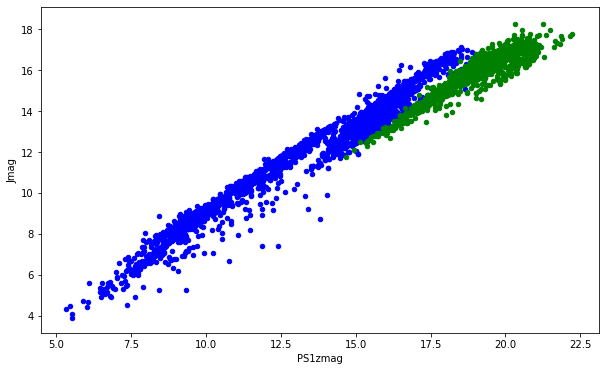

In [16]:
mag1='PS1zmag'
mag2='Jmag'
df1 = df[df['label'] == False]
fp=df1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = df[df['label'] == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

Imputing missing values with KNN imputer

In [17]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")
X = imputer.fit_transform(X)
cols = df.loc[:, 'PS1gmag':'W4mag']
dx = pandas.DataFrame(data=X, columns=cols.columns)
dx.head()

,PS1gmag,PS1rmag,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag
0,20.796133,22.253333,21.040000,19.17,17.42,15.06,14.730000,14.840000,14.183333,13.04,11.94,8.623333
1,22.443333,22.450000,20.370000,18.85,17.81,15.52,14.510000,13.710000,12.970000,12.54,11.67,8.930000
2,22.067333,22.260000,20.210000,18.57,17.57,15.71,15.030000,14.700000,14.340000,13.99,12.36,8.450000
3,22.661333,22.653333,22.300000,20.30,19.31,17.17,16.060000,15.660000,14.820000,14.57,11.73,8.100000
4,22.661333,22.580000,22.623333,21.05,19.87,17.36,16.396667,15.593333,15.340000,14.70,12.03,8.410000


In [18]:
dx['i_z'] = dx['PS1imag']-dx['PS1zmag']
dx['z_y'] = dx['PS1zmag']-dx['PS1ymag']
dx['y_J'] = dx['PS1ymag']-dx['Jmag']
dx['J_H'] = dx['Jmag']-dx['Hmag']
dx['H_Ks'] = dx['Hmag']-dx['Ksmag']
dx['W1_W2'] = dx['W1mag']-dx['W2mag']
X = np.array(dx.loc[:, 'PS1gmag':'W1_W2'])
dx.head()

,PS1gmag,PS1rmag,PS1imag,PS1zmag,PS1ymag,Jmag,Hmag,Ksmag,W1mag,W2mag,W3mag,W4mag,i_z,z_y,y_J,J_H,H_Ks,W1_W2
0,20.796133,22.253333,21.040000,19.17,17.42,15.06,14.730000,14.840000,14.183333,13.04,11.94,8.623333,1.870000,1.75,2.36,0.330000,-0.110000,1.143333
1,22.443333,22.450000,20.370000,18.85,17.81,15.52,14.510000,13.710000,12.970000,12.54,11.67,8.930000,1.520000,1.04,2.29,1.010000,0.800000,0.430000
2,22.067333,22.260000,20.210000,18.57,17.57,15.71,15.030000,14.700000,14.340000,13.99,12.36,8.450000,1.640000,1.00,1.86,0.680000,0.330000,0.350000
3,22.661333,22.653333,22.300000,20.30,19.31,17.17,16.060000,15.660000,14.820000,14.57,11.73,8.100000,2.000000,0.99,2.14,1.110000,0.400000,0.250000
4,22.661333,22.580000,22.623333,21.05,19.87,17.36,16.396667,15.593333,15.340000,14.70,12.03,8.410000,1.573333,1.18,2.51,0.963333,0.803333,0.640000


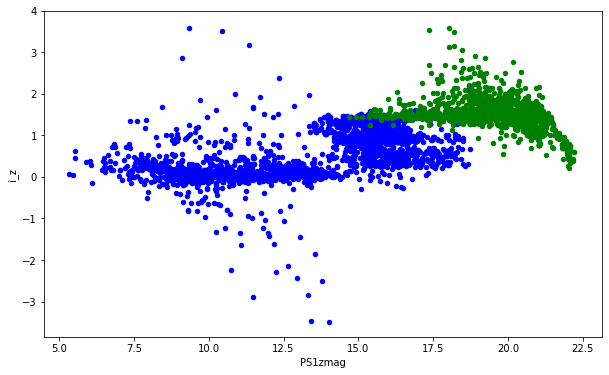

In [19]:
mag1='PS1zmag'
mag2='i_z'
dx1 = dx[y == False]
fp=dx1.plot.scatter(x=mag1, y=mag2, c='b',figsize=(10, 6))
df2 = dx[y == True]
df2.plot.scatter(x=mag1, y=mag2, c='g', ax=fp)
plt.show()

In [20]:
X_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123)

In [72]:
scaler = StandardScaler()

In [73]:
X_train2 = scaler.fit_transform(X_train)
x_val2 = scaler.transform(x_val)
x_test2 = scaler.transform(x_test)

Random Forest:

In [ ]:
model_rf = RandomForestClassifier(n_estimators=1000, max_depth=5, class_weight='balanced')
model_rf.fit(X_train2, y_train)
y_pred_rf = model_rf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_rf, y_val)
print(corr_rf)

In [ ]:
features = [4,6]

dict_v = {i:[np.quantile(X_train2[:,i], 0.4), np.quantile(X_train2[:,i], 0.5), np.quantile(X_train2[:,i], 0.6),np.quantile(X_train2[:,i], 0.75)] for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:X_train2.std(0)[i] for i in range(len(X_train2[0])) if i not in features}

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=model_rf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

SVM:

In [22]:
from sklearn import svm

In [ ]:
svc_clf = svm.SVC(kernel='linear', C=0.1, class_weight='balanced', gamma='auto',decision_function_shape='ovr',random_state=123)
svc_clf.fit(X_train2, y_train)
y_pred_svc = svc_clf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_svc, y_val)
print(corr_rf)

In [ ]:
features = [3,7]

dict_v = {i:[np.quantile(X_train2[:,i], 0.4), np.quantile(X_train2[:,i], 0.5), np.quantile(X_train2[:,i], 0.6),np.quantile(X_train2[:,i], 0.75)] for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:X_train2.std(0)[i] for i in range(len(X_train2[0])) if i not in features}

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=svc_clf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

XGBoost

In [26]:
import xgboost

In [37]:
xgb_clf = xgboost.XGBClassifier(max_depth=5, n_estimators=500, booster='gbtree',
                            n_jobs=2, random_state=1)

In [38]:
xgb_clf.fit(X_train2, y_train)
y_pred_xgb = xgb_clf.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_xgb, y_val)
print(corr_rf)

c:\Users\saser\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:10:48] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.963843605575871


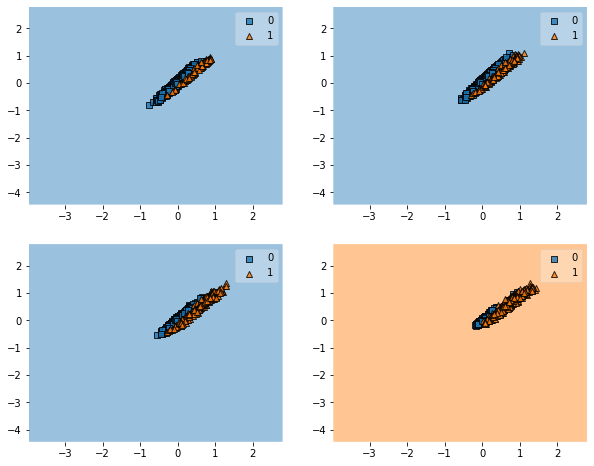

In [39]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=xgb_clf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

Fitting parameters of svm model

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 5, 10, 20, 50], 'gamma':('scale', 'auto'), 
              'class_weight':['balanced']}
svc = svm.SVC()
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(svc, parameters, cv=skf)
clf.fit(X_train2, y_train)
clf.best_estimator_

SVC(C=2, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
des_svc = clf.best_estimator_
des_svc.fit(X_train2, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
y_pred_dsvc = des_svc.predict(x_val2)
corr_rf = matthews_corrcoef(y_pred_dsvc, y_val)
rec_sc = recall_score(y_pred_dsvc, y_val)
print(rec_sc)

0.9703264094955489


c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


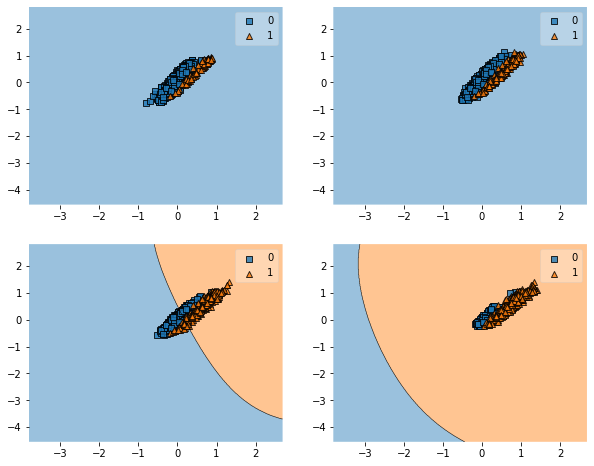

In [46]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=des_svc,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

In [47]:
features = [3,7]

dict_v = {i:[np.quantile(x_val2[:,i], 0.4), np.quantile(x_val2[:,i], 0.5), np.quantile(x_val2[:,i], 0.6),np.quantile(x_val2[:,i], 0.75)] for i in range(len(x_val2[0])) if i not in features}
dict_vv = {i:x_val2.std(0)[i] for i in range(len(x_val2[0])) if i not in features}

c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)
c:\Users\saser\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:246: UserWarning: No contour levels were found within the data range.
  antialiased=True)


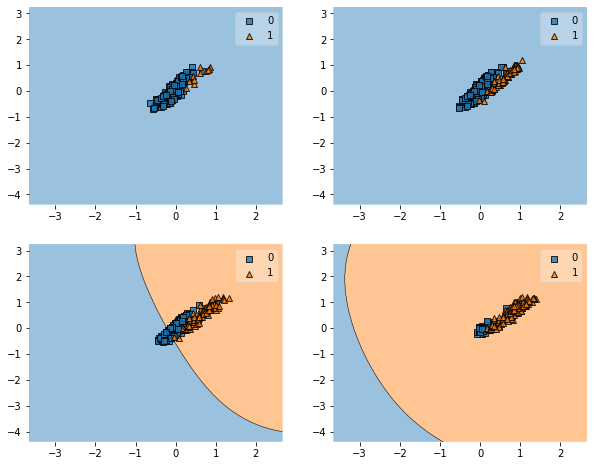

In [48]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(x_val2, np.array([int(i) for i in y_val.to_list()]), clf=des_svc,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(x_val2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

TabNet

In [49]:
from pytorch_tabnet.tab_model import  TabNetClassifier

In [50]:
tbn_clf = TabNetClassifier(n_a=11, n_d=11)  
tbn_clf.fit(X_train2, y_train,            
            eval_metric='balanced_accuracy')
y_pred_tbn = tbn_clf.predict(x_val2)
corr_tbn = matthews_corrcoef(y_pred_tbn, y_val)
print(corr_tbn)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 0.80792 |  0:00:01s
epoch 1  | loss: 0.24685 |  0:00:02s
epoch 2  | loss: 0.11486 |  0:00:03s
epoch 3  | loss: 0.09795 |  0:00:04s
epoch 4  | loss: 0.08027 |  0:00:04s
epoch 5  | loss: 0.08337 |  0:00:05s
epoch 6  | loss: 0.07346 |  0:00:06s
epoch 7  | loss: 0.06756 |  0:00:07s
epoch 8  | loss: 0.06315 |  0:00:08s
epoch 9  | loss: 0.07054 |  0:00:09s
epoch 10 | loss: 0.07678 |  0:00:10s
epoch 11 | loss: 0.06151 |  0:00:11s
epoch 12 | loss: 0.06564 |  0:00:11s
epoch 13 | loss: 0.05984 |  0:00:12s
epoch 14 | loss: 0.0654  |  0:00:13s
epoch 15 | loss: 0.05835 |  0:00:14s
epoch 16 | loss: 0.0583  |  0:00:14s
epoch 17 | loss: 0.06264 |  0:00:15s
epoch 18 | loss: 0.05415 |  0:00:16s
epoch 19 | loss: 0.05479 |  0:00:17s
epoch 20 | loss: 0.052   |  0:00:18s
epoch 21 | loss: 0.05093 |  0:00:18s
epoch 22 | loss: 0.05252 |  0:00:19s
epoch 23 | loss: 0.05194 |  0:00:20s
epoch 24 | loss: 0.05

In [51]:
features = [4,13]

dict_v = {i:[np.quantile(X_train2[:,i], 0.4), np.quantile(X_train2[:,i], 0.5), np.quantile(X_train2[:,i], 0.6),np.quantile(X_train2[:,i], 0.75)] for i in range(len(X_train2[0])) if i not in features}
dict_vv = {i:X_train2.std(0)[i] for i in range(len(X_train2[0])) if i not in features}

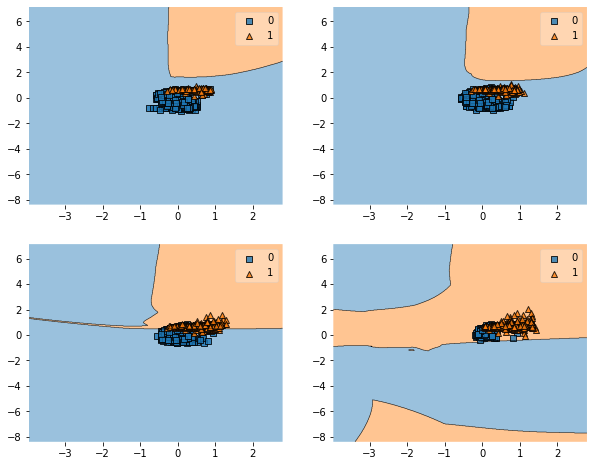

In [52]:
fig, axarr = plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X_train2, np.array([int(i) for i in y_train.to_list()]), clf=tbn_clf,
                      feature_index=features,
                      filler_feature_values={x:dict_v[x][i] for x in range(len(X_train2[0])) if x not in features},
                      filler_feature_ranges=dict_vv,ax=ax)

Training on 2 features

In [53]:
X2_train = X_train2[:,[4,6]]
x2_val = x_val2[:,[4,6]]


In [54]:
parameters = {'kernel':['linear', 'rbf'], 'C':[1, 2, 5], 'gamma':('scale', 'auto'), 
              'class_weight':['balanced']}
svc = svm.SVC()
skf = StratifiedKFold(n_splits=5)
clf = GridSearchCV(svc, parameters, cv=skf)
clf.fit(X2_train, y_train)
clf.best_estimator_

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
des_svc = clf.best_estimator_
des_svc.fit(X2_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
y_pred_dsvc2 = des_svc.predict(x2_val)
corr_rf = matthews_corrcoef(y_pred_dsvc, y_val)
rec_sc = recall_score(y_pred_dsvc, y_val)
print(rec_sc)

0.9703264094955489


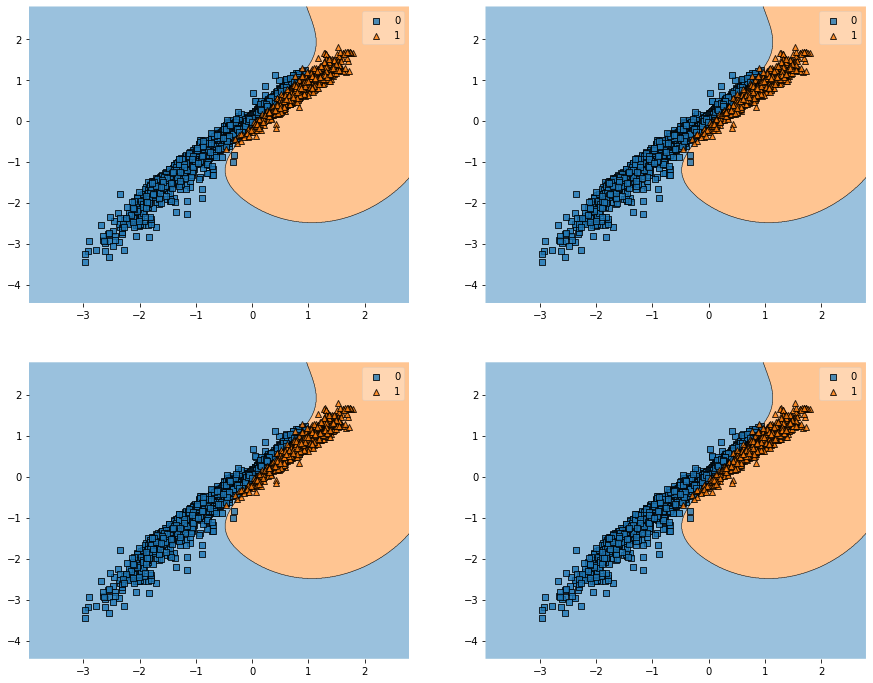

In [57]:
fig, axarr = plt.subplots(2, 2, figsize=(15,12), sharex=True, sharey=True)
for i, ax in enumerate(axarr.flat):
    plot_decision_regions(X2_train, np.array([int(i) for i in y_train.to_list()]), clf=des_svc, ax=ax)

In [58]:
dfy= pandas.DataFrame(data=y_val.values, columns=['y_true'])
dfy['y_pred2'] = y_pred_dsvc2
dfy['y_pred_all'] = y_pred_dsvc
dfy.loc[dfy['y_true']!=dfy['y_pred_all']]

,y_true,y_pred2,y_pred_all
99,False,True,True
157,False,True,True
171,False,True,True
232,False,True,True
293,False,False,True
297,False,True,True
335,True,False,False
375,False,True,True
434,False,True,True
483,True,False,False


Selecting features with Boruta

In [59]:
from boruta import BorutaPy

In [70]:
feat_selector = BorutaPy(svc_clf, n_estimators='auto', verbose=2, random_state=42, perc=0.90, two_step=False)

In [71]:
feat_selector.fit(X2_train, y_train)

KeyError: 'max_depth'